In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [2]:
#reding the data for pH in 2022
df_pH22 = pd.read_csv("Merging\pH\pH_2022.csv", encoding = 'unicode_escape', sep = ';')
#Removing the forth useless col
del df_pH22["Unnamed: 3"]
#Replace the non-number values with NaN
df_pH22['pH_Wert'].replace(['I','W','F','S','FW','FU','FWU','WU','WB',
                                           'UW','U','UN','UB','FB','IU','SU','BU','X','WN','SN',
                                          'FN','FUN','WUN','XN','FBN','KWN','NU','WNU','FNU','FWNU','SNU',
                                           'XNU','BNU','BN','FWN','KN'], np.nan, inplace=True)
#Replace the comma in with dot for decimals to be able to change them to float later
df_pH22['pH_Wert'] = df_pH22['pH_Wert'].str.replace(',','.')
#Change the date and time format to date time
df_pH22['Datum'] = pd.to_datetime(df_pH22['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_pH22['Uhrzeit'] = pd.to_datetime(df_pH22['Uhrzeit'], format='%H:%M', errors='coerce').dt.time
df_pH22

,Datum,Uhrzeit,pH_Wert
0,2022-01-01,00:00:00,8.03
1,2022-01-01,00:10:00,8.02
2,2022-01-01,00:20:00,8.02
3,2022-01-01,00:30:00,8.02
4,2022-01-01,00:40:00,8.01
...,...,...,...
52557,2022-12-31,23:10:00,7.95
52558,2022-12-31,23:20:00,7.95
52559,2022-12-31,23:30:00,7.95
52560,2022-12-31,23:40:00,7.95


In [3]:
#Reading the date for pH 1988_2004
df_pH21_1st = pd.read_csv("Merging\pH\pH_1988bis2004.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_pH21_1st['pH_Wert'] = df_pH21_1st['pH_Wert'].str.replace(',','.')
#Change the date and time format to date time
df_pH21_1st['Datum'] = pd.to_datetime(df_pH21_1st['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_pH21_1st['Uhrzeit'] = pd.to_datetime(df_pH21_1st['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_pH21_1st

,Datum,Uhrzeit,pH_Wert
0,1988-06-19,01:00:00,7.5
1,1988-06-19,01:05:00,7.5
2,1988-06-19,01:10:00,7.5
3,1988-06-19,01:15:00,7.5
4,1988-06-19,01:20:00,7.5
...,...,...,...
802228,2004-12-31,23:10:00,8.1
802229,2004-12-31,23:20:00,8.1
802230,2004-12-31,23:30:00,8.1
802231,2004-12-31,23:40:00,8.1


In [4]:
#Reading the date for pH 2005_2021
df_pH21_2nd = pd.read_csv("Merging\pH\pH_2005bis2021.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_pH21_2nd['pH_Wert'] = df_pH21_2nd['pH_Wert'].str.replace(',','.')
#Change the date and time format to date time
df_pH21_2nd['Datum'] = pd.to_datetime(df_pH21_2nd['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_pH21_2nd['Uhrzeit'] = pd.to_datetime(df_pH21_2nd['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
#Chacking the 2016 data
startdate = pd.to_datetime("2016-01-01").date()
enddate = pd.to_datetime("2016-02-01").date()
df_pH21_2nd[(df_pH21_2nd['Datum'] > startdate) & (df_pH21_2nd['Datum'] < enddate)]

,Datum,Uhrzeit,pH_Wert
535280,2016-01-02,00:00:00,8.2
535281,2016-01-02,00:10:00,8.2
535282,2016-01-02,00:20:00,8.2
535283,2016-01-02,00:30:00,8.2
535284,2016-01-02,00:40:00,8.2
...,...,...,...
539595,2016-01-31,23:10:00,8.1
539596,2016-01-31,23:20:00,8.1
539597,2016-01-31,23:30:00,8.1
539598,2016-01-31,23:40:00,8.1


In [5]:
#Appending the dataframes
df_pH = pd.concat([df_pH21_1st, df_pH21_2nd, df_pH22], ignore_index = True)
df_pH

,Datum,Uhrzeit,pH_Wert
0,1988-06-19,01:00:00,7.5
1,1988-06-19,01:05:00,7.5
2,1988-06-19,01:10:00,7.5
3,1988-06-19,01:15:00,7.5
4,1988-06-19,01:20:00,7.5
...,...,...,...
1679266,2022-12-31,23:10:00,7.95
1679267,2022-12-31,23:20:00,7.95
1679268,2022-12-31,23:30:00,7.95
1679269,2022-12-31,23:40:00,7.95


In [6]:
#Summary and formatting str to float, and change type to datetime:
df_pH['pH_Wert']=df_pH['pH_Wert'].astype(float)
df_pH['Datum'] = pd.to_datetime(df_pH['Datum'])
df_pH.info()
#Exporting to csv file
df_pH.to_csv('Merging\pH\pH1988_2022.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679271 entries, 0 to 1679270
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Datum    1679269 non-null  datetime64[ns]
 1   Uhrzeit  1679269 non-null  object        
 2   pH_Wert  1600488 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 38.4+ MB


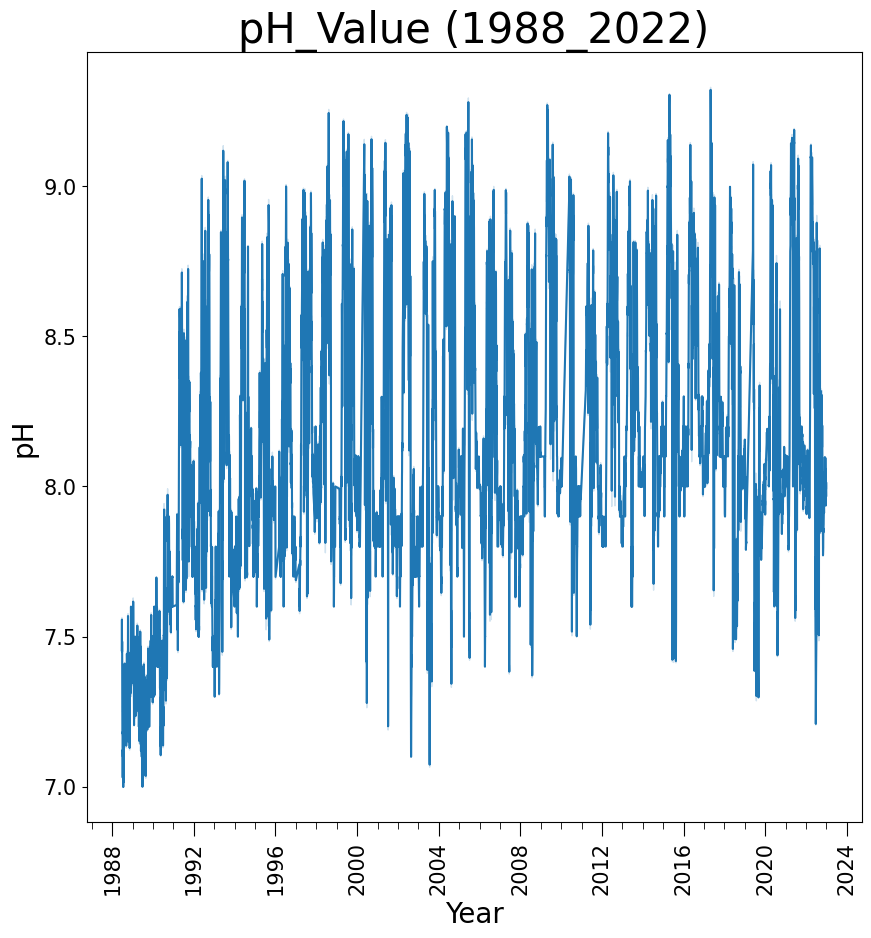

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.lineplot(data = df_pH, x='Datum', y='pH_Wert')
fig.axes.set_title("pH_Value (1988_2022)",fontsize=30)
fig.set_xlabel("Year",fontsize=20)
fig.set_ylabel("pH",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.YearLocator(4))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.YearLocator())
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()